## 데이터 세트 종류 확인

In [1]:
import re, json
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
PATH = '/home/ai-sjjy/workspace/juyoung/HousePrices/dataset/'

In [3]:
TRAIN = 'train.csv'
TEST = 'test.csv'

SAMPLE = 'sample_submission.csv'

In [4]:
train_df = pd.read_csv(PATH + TRAIN)
test_df = pd.read_csv(PATH + TEST)

#### [1-1] 구조 확인 (속성)

In [5]:
# 속성 확인
print("train 속성 : ", train_df.columns)
print()
print("test 속성 : ", test_df.columns)

train 속성 :  Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond',

In [6]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 데이터 분석

#### [1] 결측 데이터 확인

In [9]:
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [10]:
print("train 개수 : ", len(train_df))
print("test 개수 : ", len(test_df))

train 개수 :  1460
test 개수 :  1459


In [11]:
print(train_df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### [2] SalePrice = 예측할 y

* 연속 데이터 이다 => 회귀 사용해야 함

In [12]:
print("nan 존재 확인 ", train_df[train_df['SalePrice'].isnull()])

nan 존재 확인  Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


In [13]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/ai-sjjy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

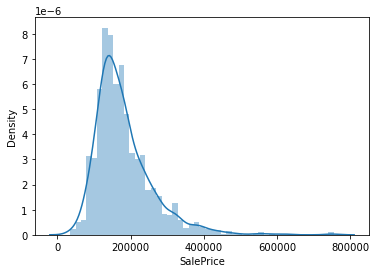

In [14]:
sns.distplot(train_df['SalePrice'])

#### [3] 상관관계

* 현재 속성(컬럼)이 80개(정답 빼고)이기 때문에 모두 사용할 x 
* *상관관계*를 검토해보자

    => 상관관계 : 피어슨 이용 (x와 y가 함꼐 변화는 정돕 / x와 y가 각각 변하는 정도)
    
    => x==y : +1 / x !=y : 0 (너무 다르면) / -x == -y : -1 (반대 방향)
    
    => (0.7 ~ 1.0) : 강한 양적 상관 관계
    
    => (0.3 ~ 0.7) : 뚜렷한 양적 상관 관계
    
    => (0.1 ~ 0.3) : 약한 양적 상관 관계
    
    => (-0.1 ~ 0.1) : 상관 관계 x
    
    => (-0.3 ~ -0.1) : 약한 음적 상관 관계
    
    => (-0.7 ~ -0.3) : 뚜렷한 음적 상관 관계
    
    => (-0.1 ~ -0.7) : 강한 음적 상관 관계

In [15]:
train_df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [16]:
corr = train_df.corr()

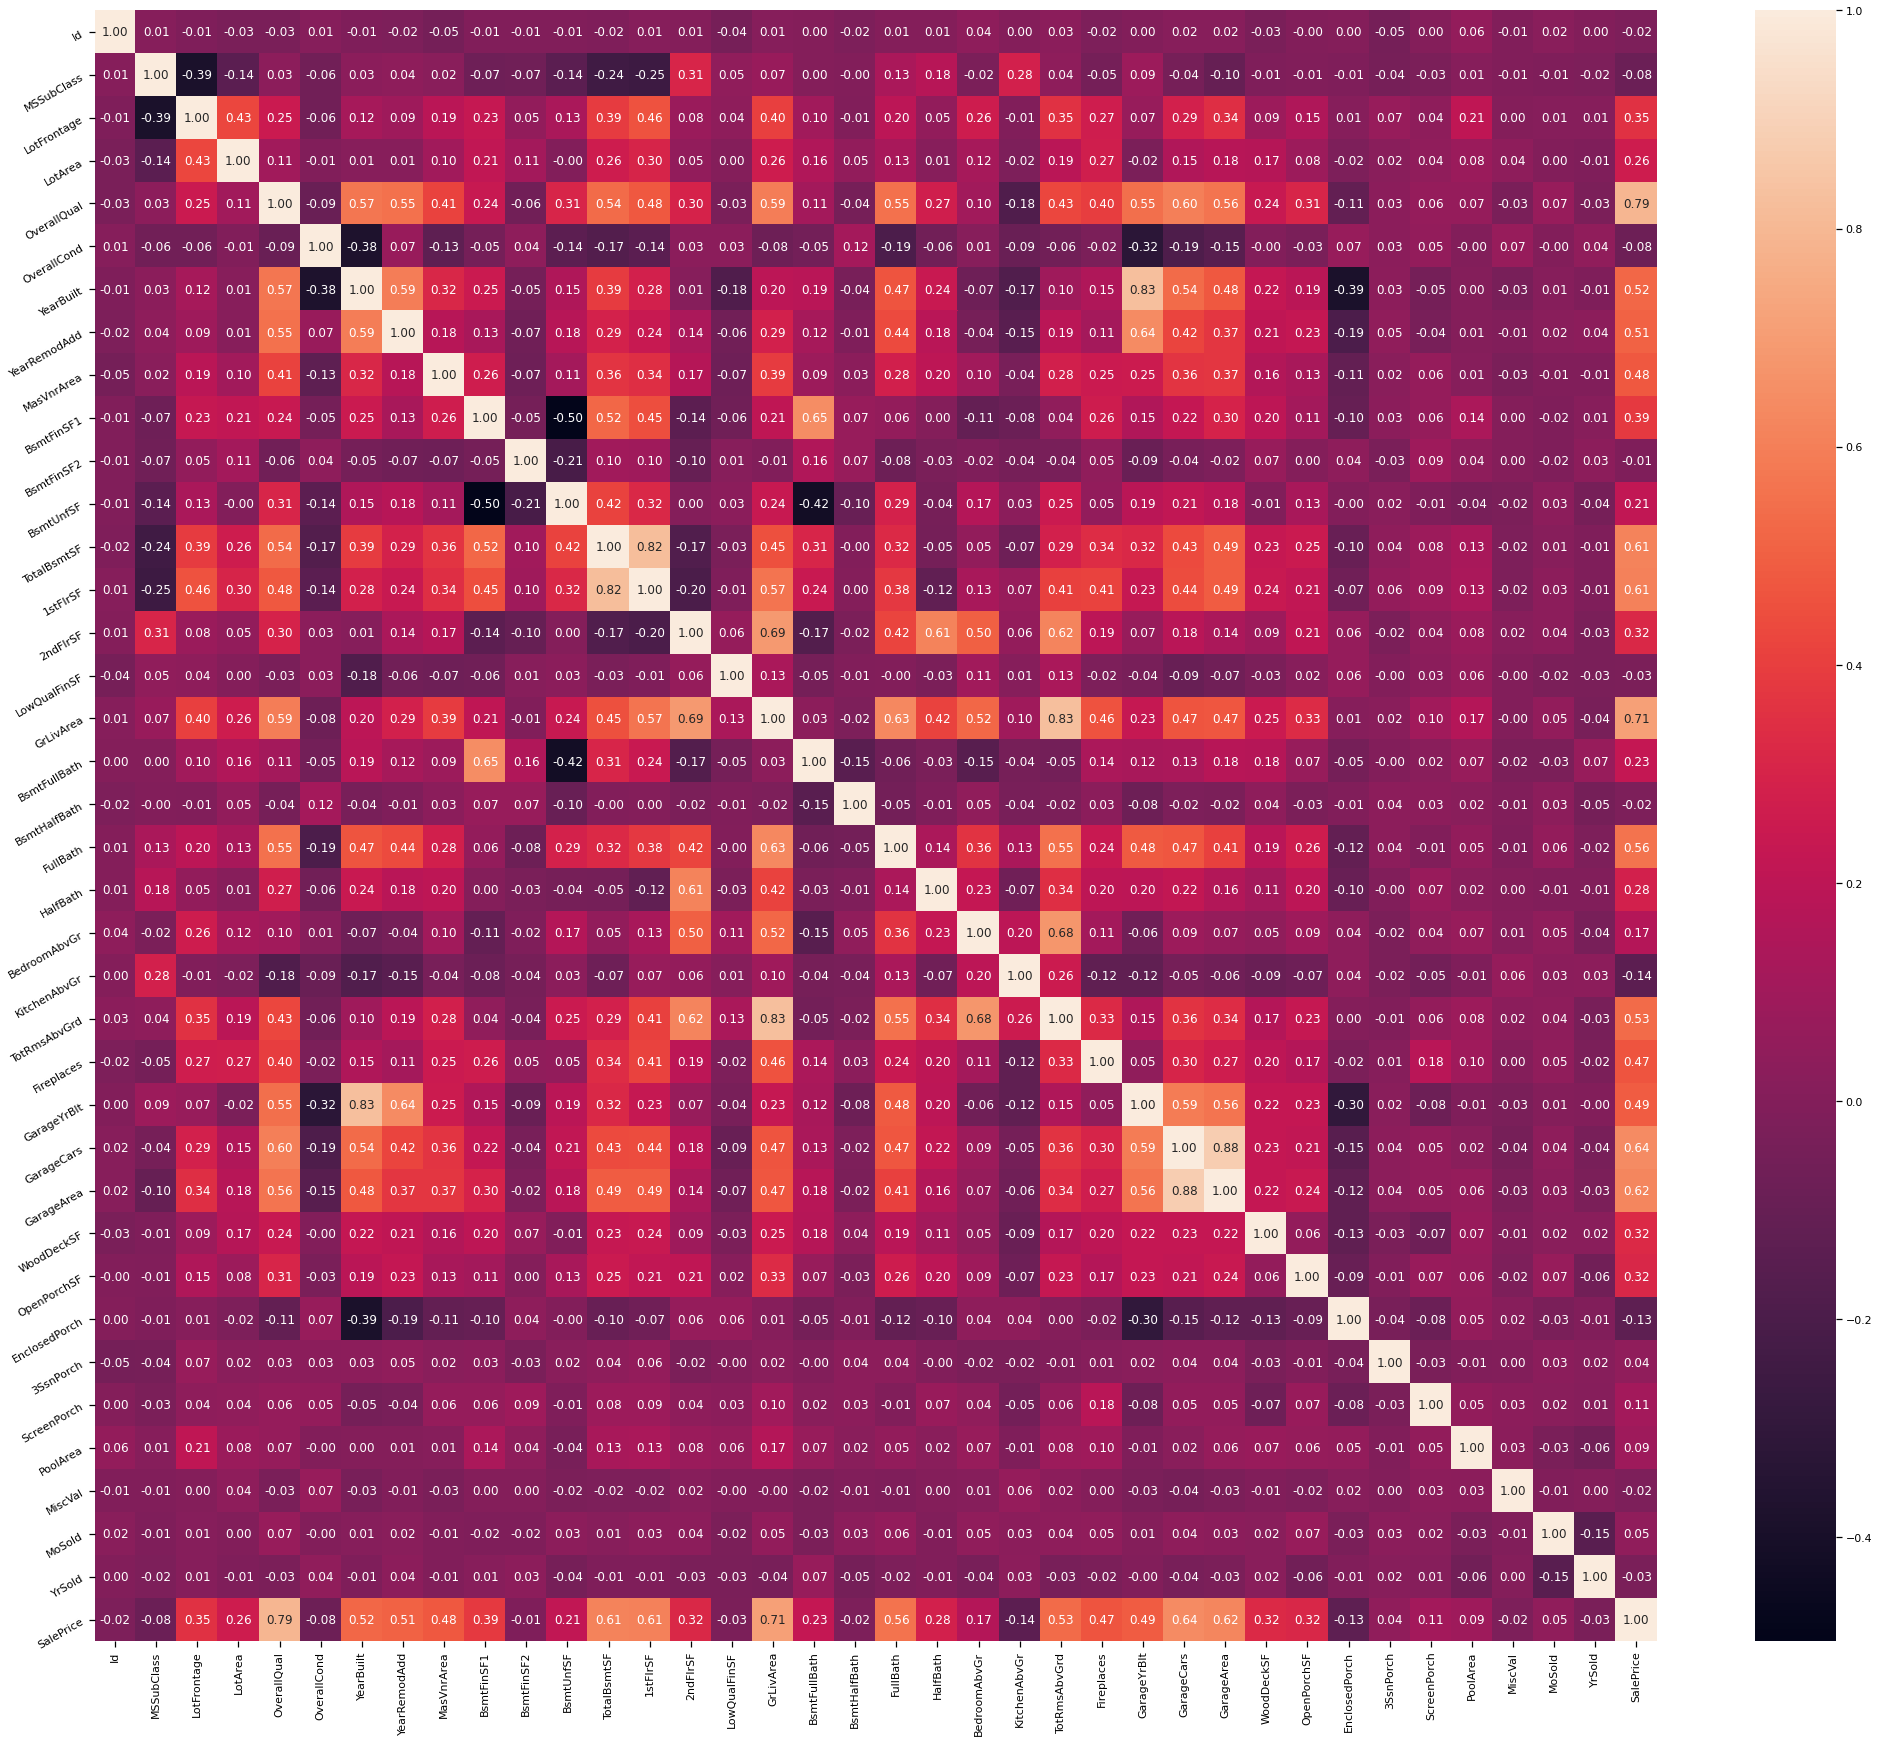

In [17]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(35,30))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

* 상관 관계있는 속성만 꺼내기 위해 (0.1 ~ 0.3) 0.2 이상인 변수만 고를 것이다!

In [18]:
top_corr_features = corr.index[abs(corr["SalePrice"])>=0.2]

In [19]:
top_corr_features # 속성 값들 보여줌

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

* 뚜렷하게 보기 위해 heatmap사용

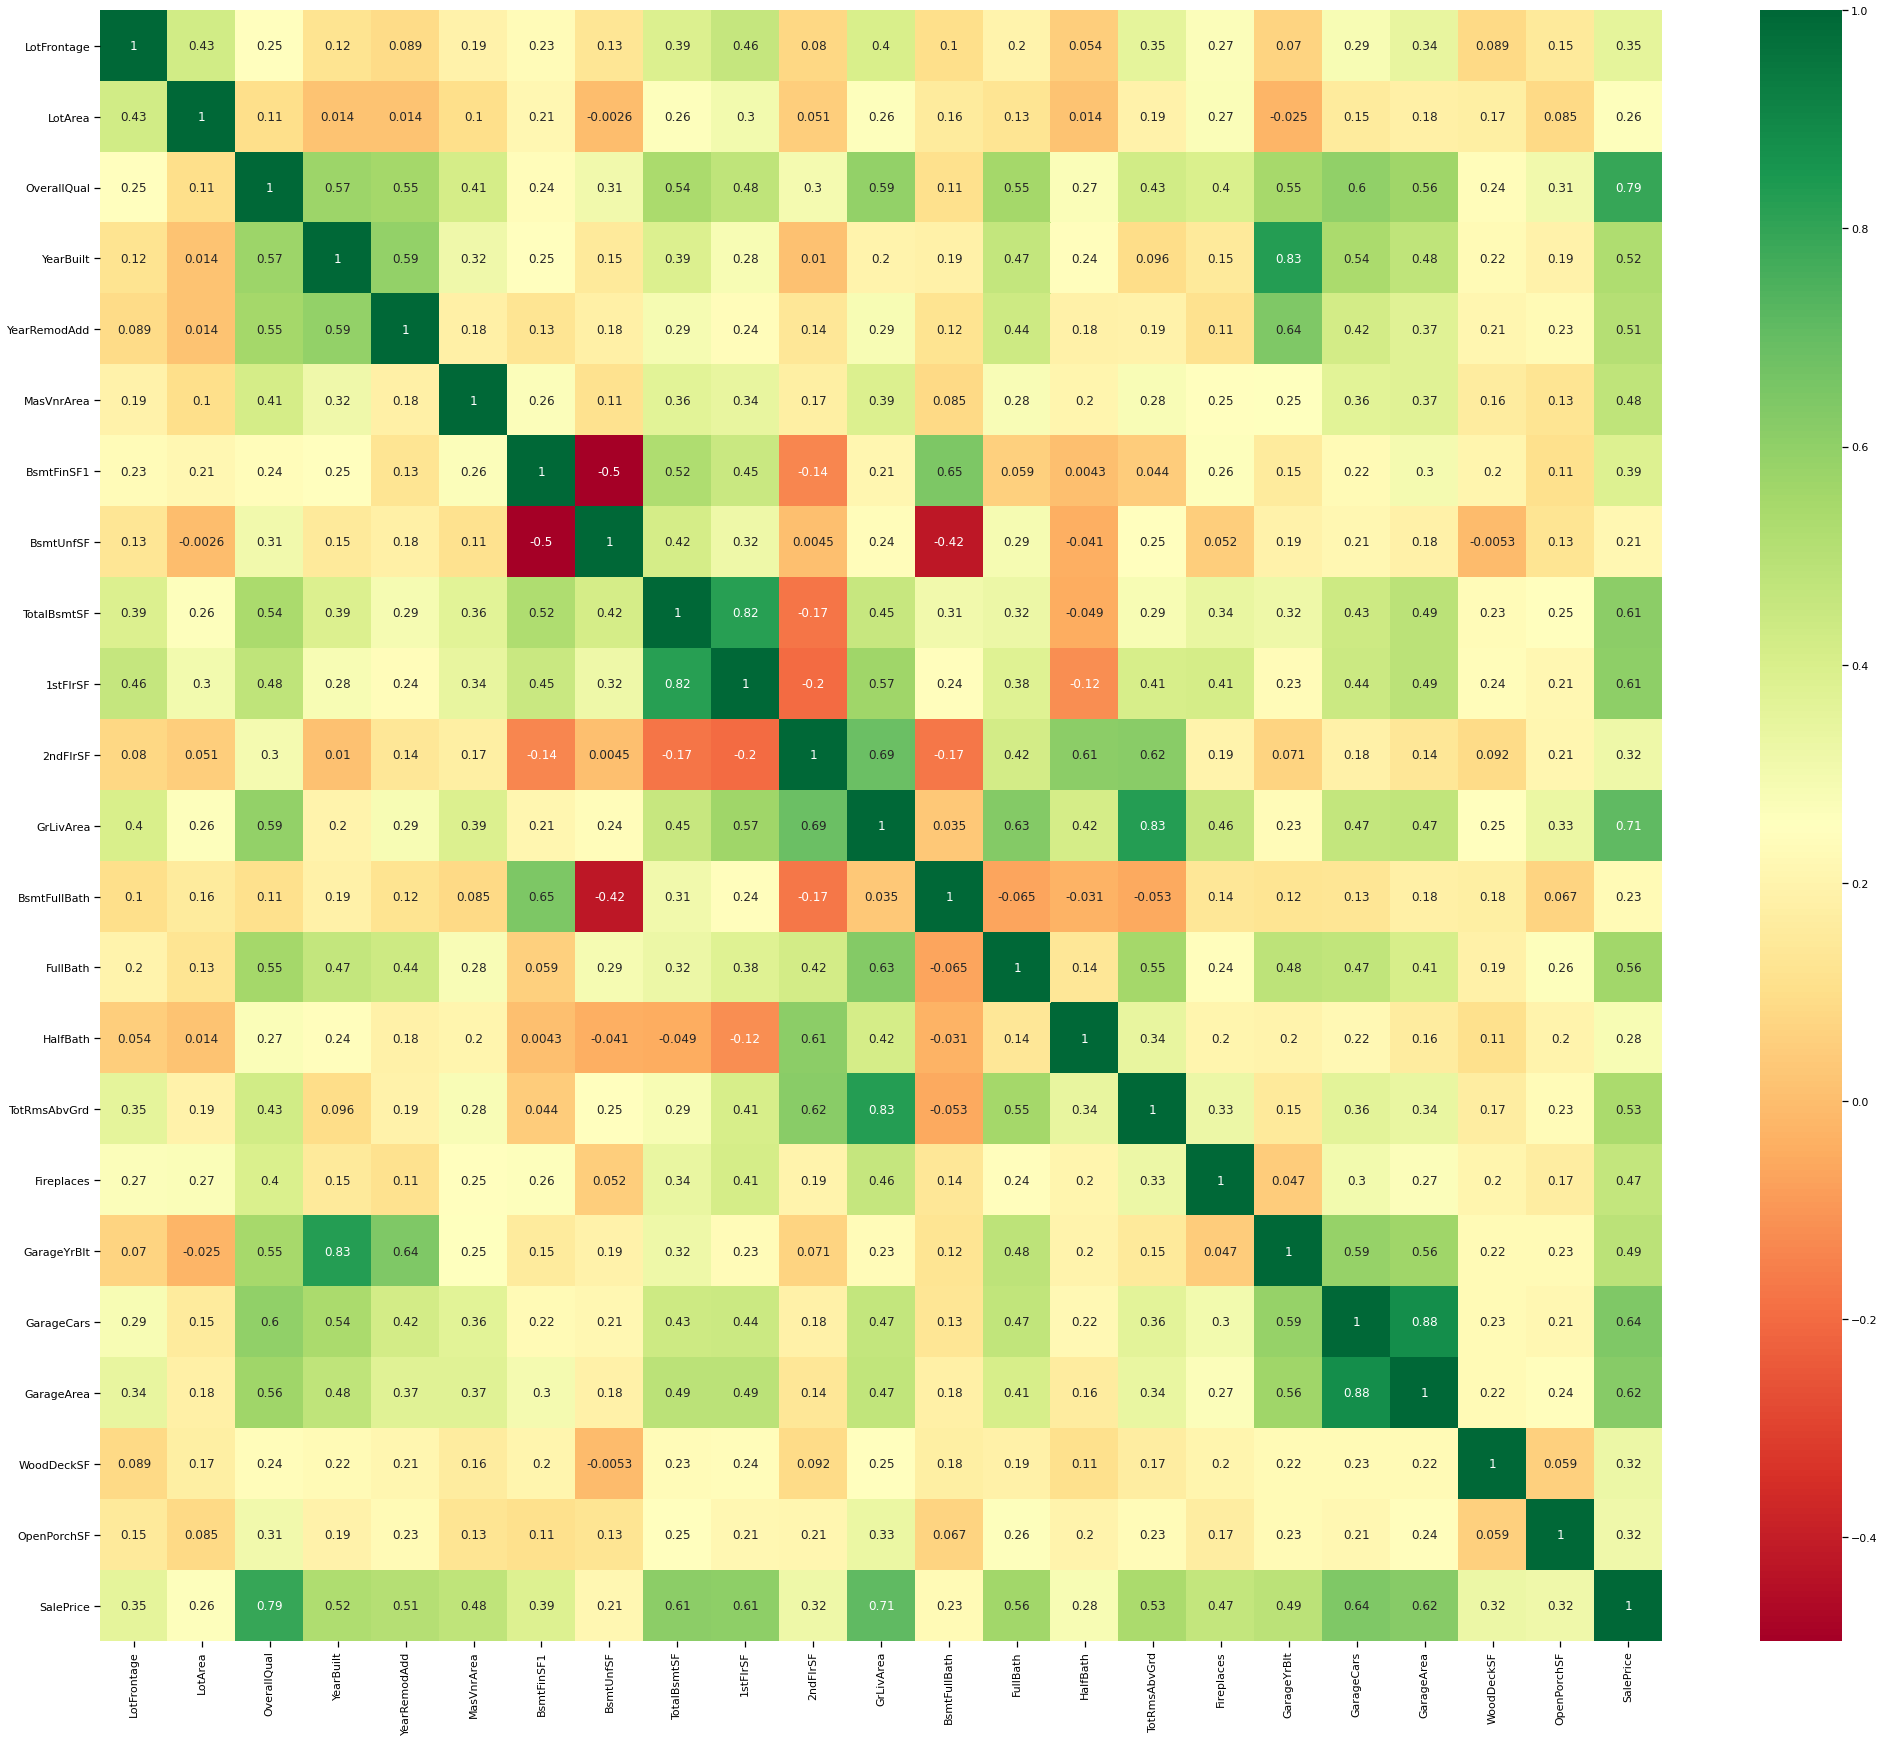

In [20]:
plt.figure(figsize=(35,30))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
"""
Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')
"""

"\nIndex(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',\n       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',\n       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',\n       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',\n       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],\n      dtype='object')\n"

In [22]:
temp_df = train_df[top_corr_features]
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   OverallQual   1460 non-null   int64  
 3   YearBuilt     1460 non-null   int64  
 4   YearRemodAdd  1460 non-null   int64  
 5   MasVnrArea    1452 non-null   float64
 6   BsmtFinSF1    1460 non-null   int64  
 7   BsmtUnfSF     1460 non-null   int64  
 8   TotalBsmtSF   1460 non-null   int64  
 9   1stFlrSF      1460 non-null   int64  
 10  2ndFlrSF      1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  FullBath      1460 non-null   int64  
 14  HalfBath      1460 non-null   int64  
 15  TotRmsAbvGrd  1460 non-null   int64  
 16  Fireplaces    1460 non-null   int64  
 17  GarageYrBlt   1379 non-null   float64
 18  GarageCars    1460 non-null 

In [23]:
temp_df.isnull().sum()

LotFrontage     259
LotArea           0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

* 위 속성 값들 하나씩 확인하면 이상치, 결측치 제거

### 결측치 제거

In [24]:
train_df.isnull().sum().sort_values(ascending=False)[:20] #PoolQC, MiscFeature 등 null값이 많은게 있음

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [25]:
test_df.isnull().sum().sort_values(ascending=False)[:20] #PoolQC, MiscFeature 등 null값이 많은게 있음

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

* null 값의 비율이 50%이상인 속성은 제거하기

=> Alley <br>
=> PoolQC <br>
=> Fence <br>
=> MiscFeature

이 값들은 애초에 거의 80퍼에 가까움 !! 제거하기!

In [26]:
delete_df = test_df.isnull().sum()/len(train_df)
delete_df[delete_df >= 0.5]

Alley          0.926027
FireplaceQu    0.500000
PoolQC         0.997260
Fence          0.800685
MiscFeature    0.964384
dtype: float64

In [27]:
delete_df = train_df.isnull().sum()/len(train_df)
delete_df[delete_df >= 0.5]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [28]:
delete = delete_df[delete_df >= 0.5].index.tolist()

for d in delete:
    train_df.drop(d, axis=1, inplace=True)
    test_df.drop(d, axis=1, inplace=True)

##### (1) LotFrontage(지상 거실 면적)

https://www.kaggle.com/keerthi182e5/house-price-prediction

=> 이 값을 mean으로 대체 

=> 이유는..? train_df['LotFrontage'].mean(),inplace=True

* 결측치 : LotFrontage = 259 개
* 이상치 존재

In [29]:
train_df['LotFrontage'].fillna(0, inplace=True)

In [30]:
test_df['LotFrontage'].fillna(0, inplace=True)

##### (2) GarageType, GarageFinish, GarageQual, GarageCond

In [31]:
"""
57  GarageType     1379 non-null   object 
58  GarageYrBlt    1379 non-null   float64
59  GarageFinish   1379 non-null   object 
60  GarageCars     1460 non-null   int64  
61  GarageArea     1460 non-null   int64  
62  GarageQual     1379 non-null   object 
63  GarageCond     1379 non-null   object 
"""

'\n57  GarageType     1379 non-null   object \n58  GarageYrBlt    1379 non-null   float64\n59  GarageFinish   1379 non-null   object \n60  GarageCars     1460 non-null   int64  \n61  GarageArea     1460 non-null   int64  \n62  GarageQual     1379 non-null   object \n63  GarageCond     1379 non-null   object \n'

In [32]:
train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [33]:
train_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [34]:
train_df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [35]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

* 범주형이니까 => 'None'으로 대체

In [36]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_df[col] = train_df[col].fillna('None')

In [37]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    test_df[col] = test_df[col].fillna('None')

##### (3) GarageYrBlt, GarageCars, GarageArea

* GarageYrBlt      81 => 이 속성만 결측치 존재하니까 이부분만 처리!

* Garage가 없는 경우, 주차 가능 대수가 0이므로 0으로 결측치를 대체함

In [38]:
train_df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [39]:
train_df['GarageCars'].unique()

array([2, 3, 1, 0, 4])

In [40]:
test_df['GarageCars'] = test_df['GarageCars'].fillna(0)

In [41]:
train_df['GarageArea'].unique()

array([ 548,  460,  608,  642,  836,  480,  636,  484,  468,  205,  384,
        736,  352,  840,  576,  516,  294,  853,  280,  534,  572,  270,
        890,  772,  319,  240,  250,  271,  447,  556,  691,  672,  498,
        246,    0,  440,  308,  504,  300,  670,  826,  386,  388,  528,
        894,  565,  641,  288,  645,  852,  558,  220,  667,  360,  427,
        490,  379,  297,  283,  509,  405,  758,  461,  400,  462,  420,
        432,  506,  684,  472,  366,  476,  410,  740,  648,  273,  546,
        325,  792,  450,  180,  430,  594,  390,  540,  264,  530,  435,
        453,  750,  487,  624,  471,  318,  766,  660,  470,  720,  577,
        380,  434,  866,  495,  564,  312,  625,  680,  678,  726,  532,
        216,  303,  789,  511,  616,  521,  451, 1166,  252,  497,  682,
        666,  786,  795,  856,  473,  398,  500,  349,  454,  644,  299,
        210,  431,  438,  675,  968,  721,  336,  810,  494,  457,  818,
        463,  604,  389,  538,  520,  309,  429,  6

In [42]:
test_df['GarageArea'] = test_df['GarageArea'].fillna(0)

In [43]:
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)

In [44]:
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(0)

In [45]:
temp_corr = corr[['GarageYrBlt']]

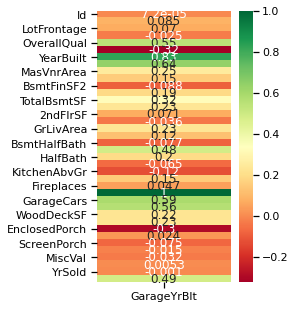

In [46]:
plt.figure(figsize=(3,5))
g = sns.heatmap(temp_corr,annot=True,cmap="RdYlGn")

##### (4) FireplaceQu(벽난로)

* 범주형 데이터 => nan은 'None'으로

In [47]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [48]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('None')

In [49]:
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('None')

##### (5) BsmtExposure, BsmtFinType2, BsmtQual, BsmtCond, BsmtFinType1

In [50]:
"""
BsmtExposure     38 object 
BsmtFinType2     38 object 
BsmtQual         37 object  
BsmtCond         37 object 
BsmtFinType1     37 object 
"""

'\nBsmtExposure     38 object \nBsmtFinType2     38 object \nBsmtQual         37 object  \nBsmtCond         37 object \nBsmtFinType1     37 object \n'

In [51]:
for c in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    print(train_df[c].unique())

['No' 'Gd' 'Mn' 'Av' nan]
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


In [52]:
for c in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    train_df[c] = train_df[c].fillna('None')
    test_df[c] = test_df[c].fillna('None')

In [53]:
for c in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    print(train_df[c].unique())

['No' 'Gd' 'Mn' 'Av' 'None']
['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Gd' 'TA' 'Ex' 'None' 'Fa']
['TA' 'Gd' 'None' 'Fa' 'Po']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']


##### (5) BsmtHalfBath, BsmtFullBath, BsmtFinSF1, BsmtFinSF2, BsmtUnfSf, TotalBsmtSF

* BsmtHalfBath, BsmtFullBath, BsmtFinSF1, BsmtFinSF2, BsmtUnfSf, TotalBsmtSF : 모두 숫자 => 0으로 채우기
BsmtHalfBath      0 int64  => test만 결측치 있음 제거해야 함

In [54]:
for c in ['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    train_df[c] = train_df[c].fillna(0)
    test_df[c] = test_df[c].fillna(0)

##### (6) MasVnrArea, MasVnrType

In [55]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)

In [56]:
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

In [57]:
print(train_df["MasVnrType"].unique()) # 범주형 데이터 => 'None'으로 채우기

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


In [58]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')

In [59]:
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')

##### (6) Electrical

In [60]:
print(train_df["Electrical"].unique()) # 범주형 데이터 => 'None'으로 채우기

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [61]:
train_df['Electrical'] = train_df['Electrical'].fillna('None')

In [62]:
test_df['Electrical'] = test_df['Electrical'].fillna('None')

In [63]:
train_df.isnull().sum().sort_values(ascending=False)[:5] #PoolQC, MiscFeature 등 null값이 많은게 있음

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
dtype: int64

##### (7) MSZoning (The general zoning classification) 

* 최빈으로 하는 사람이 있고, 평균, 0으로 바꾼 사람이 있다


In [64]:
test_df.MSZoning.unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [65]:
test_df['MSZoning'] = train_df['MSZoning'].fillna('None')

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

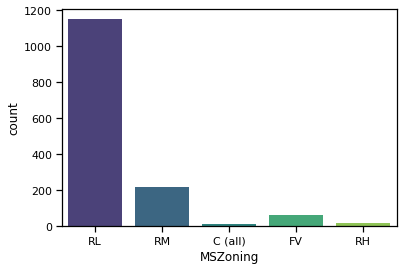

In [66]:
sns.countplot(x='MSZoning',data=test_df,palette='viridis')

##### (8) Functional


In [67]:
test_df.Functional.unique()

array(['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Sev', 'Maj2', nan],
      dtype=object)

In [68]:
test_df['Functional'] = train_df['Functional'].fillna('None')

##### (8) KitchenQuel


In [69]:
test_df.KitchenQual.unique()

array(['TA', 'Gd', 'Ex', 'Fa', nan], dtype=object)

In [70]:
test_df['KitchenQual'] = train_df['KitchenQual'].fillna('None')

##### (10) Exterior and Exterior2nd


In [71]:
test_df.Exterior1st.unique()

array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'CemntBd',
       'WdShing', 'BrkFace', 'AsbShng', 'BrkComm', 'Stucco', 'AsphShn',
       nan, 'CBlock'], dtype=object)

In [72]:
test_df['Exterior1st'] = train_df['Exterior1st'].fillna('None')

In [73]:
test_df.Exterior2nd.unique()

array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'Brk Cmn',
       'CmentBd', 'ImStucc', 'Wd Shng', 'AsbShng', 'Stucco', 'CBlock',
       'BrkFace', 'AsphShn', nan, 'Stone'], dtype=object)

In [74]:
test_df['Exterior2nd'] = train_df['Exterior2nd'].fillna('None')

##### (11) SaleType


In [75]:
test_df.SaleType.unique()

array(['WD', 'COD', 'New', 'ConLD', 'Oth', 'Con', 'ConLw', 'ConLI', 'CWD',
       nan], dtype=object)

In [76]:
test_df['SaleType'] = train_df['SaleType'].fillna('None')

##### (12) Utilities


In [77]:
test_df.Utilities.unique()

array(['AllPub', nan], dtype=object)

<AxesSubplot:xlabel='Utilities', ylabel='count'>

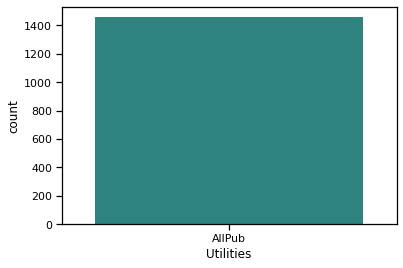

In [78]:
sns.countplot(x='Utilities',data=test_df,palette='viridis')

* 대부분이 AllPub => 데이터를 사용하지 않을 것!

In [79]:
train_df.drop('Utilities', axis=1, inplace=True)
test_df.drop('Utilities', axis=1, inplace=True)

In [80]:
test_df.isnull().sum().sort_values(ascending=False)[:5] #PoolQC, MiscFeature 등 null값이 많은게 있음

Id              0
GarageType      0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
dtype: int64

In [81]:
train_df.isnull().sum().sort_values(ascending=False)[:5] #PoolQC, MiscFeature 등 null값이 많은게 있음

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
dtype: int64

### 이상치 보완

* 이상치를 보완해야 하는 데이터들 후보군

In [82]:
sf = train_df.max() - train_df.mean()

In [83]:
temp_df = pd.DataFrame({'column_name': sf.index, 'result':sf.values})

In [84]:
temp_df = temp_df.dropna()
temp_df = temp_df[temp_df["result"] >= 600]

In [85]:
temp_df

column_name         result
0      1stFlrSF    3529.373288
1      2ndFlrSF    1718.007534
7    BsmtFinSF1    5200.360274
8    BsmtFinSF2    1427.450685
14    BsmtUnfSF    1768.759589
29   GarageArea     945.019863
36    GrLivArea    4126.536301
41           Id          729.5
46      LotArea  204728.171918
53   MasVnrArea    1496.882877
55      MiscVal   15456.510959
62     PoolArea     735.241096
66    SalePrice   574078.80411
71  TotalBsmtSF    5052.570548
72   WoodDeckSF     762.755479

* 이중에서는 SalePrice, Id는 빼고 고민해보기!

In [86]:
idles = temp_df.column_name.tolist()
idles.remove('Id')
print("idles 후보 : ", idles)

idles 후보 :  ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 'GrLivArea', 'LotArea', 'MasVnrArea', 'MiscVal', 'PoolArea', 'SalePrice', 'TotalBsmtSF', 'WoodDeckSF']


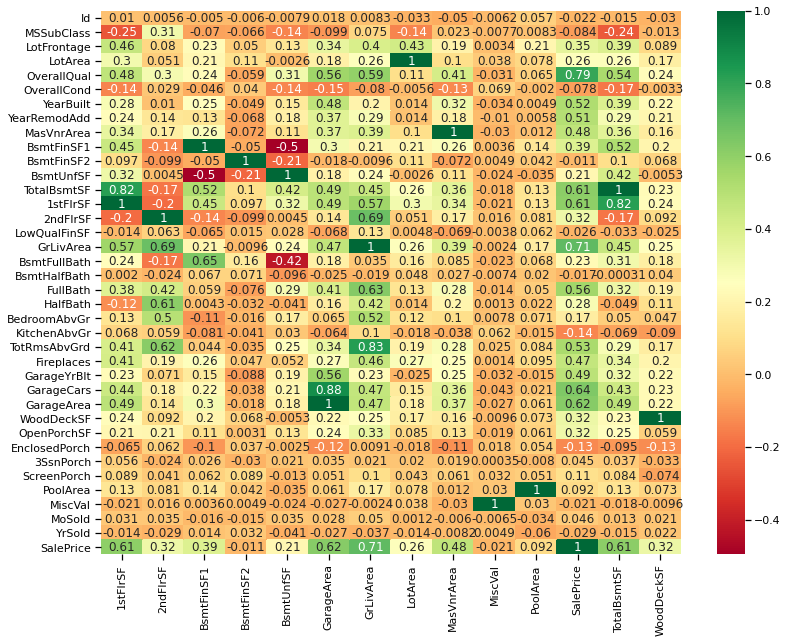

In [87]:
temp_corr = corr[idles]
plt.figure(figsize=(13,10))
g = sns.heatmap(temp_corr,annot=True,cmap="RdYlGn")

* SalePrice 상관 관계를 보면, 이 이상치 index 중에서 BsmtFinSF2, MiscVal, PoolArea은 낮은 상관관계를 보여준다

* 이 세개의 데이터 속성은 제거하고 시작한다.

##### '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GrLivArea', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'WoodDeckSF' 이상치 확인

In [88]:
train_df.drop('BsmtFinSF2', axis=1, inplace = True)
train_df.drop('MiscVal', axis=1, inplace = True)
train_df.drop('PoolArea', axis=1, inplace = True)

In [89]:
test_df.drop('BsmtFinSF2', axis=1, inplace = True)
test_df.drop('MiscVal', axis=1, inplace = True)
test_df.drop('PoolArea', axis=1, inplace = True)

#### [1] GrLiveArea

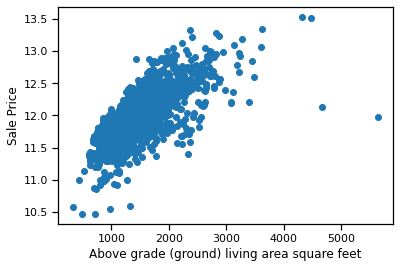

In [90]:
plt.scatter(x=train_df['GrLivArea'], y=np.log(train_df.SalePrice))  #outlier가 보임.
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

* 상관 관계가 높지만, 이상치 있음 => 값의 차이가 크기 때문에 이 행 두개는 제거

In [91]:
train_df = train_df[train_df['GrLivArea']<4000] #위 그림을 보고 이상치 제거

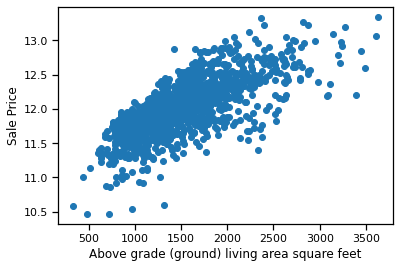

In [92]:
plt.scatter(x=train_df['GrLivArea'], y=np.log(train_df.SalePrice))  #outlier가 보임.
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

#### [2] TotalBsmtSF

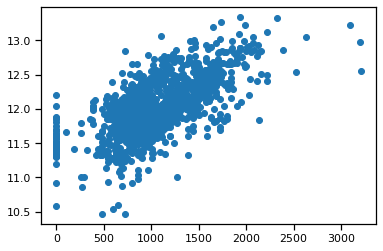

In [93]:
plt.scatter(x=train_df['TotalBsmtSF'], y=np.log(train_df.SalePrice)) #이상치 보임

* 이상치 부분 : 2500보다 큰 부분 (3개_)

In [94]:
train_df = train_df[train_df['TotalBsmtSF']<2500] #위 그림을 보고 이상치 제거

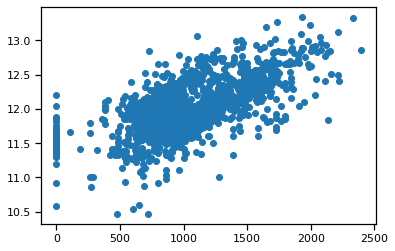

In [95]:
plt.scatter(x=train_df['TotalBsmtSF'], y=np.log(train_df.SalePrice)) #이상치 보임

#### [3] 1stFlrSF

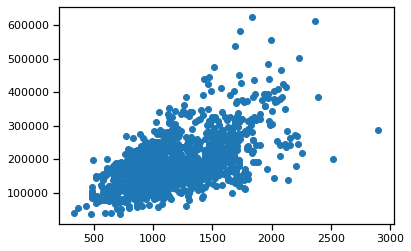

In [96]:
plt.scatter(x=train_df['1stFlrSF'], y=train_df.SalePrice) #이상치 보임

* 이상치 부분 : 2500보다 큰 부분 (2개_)

In [97]:
train_df = train_df[train_df['1stFlrSF']<2500] #위 그림을 보고 이상치 제거

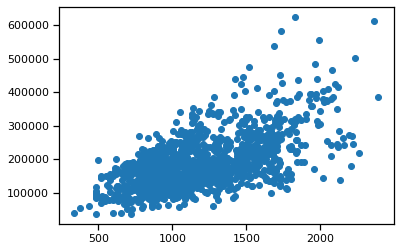

In [98]:
plt.scatter(x=train_df['1stFlrSF'], y=train_df.SalePrice) #이상치 보임

#### [4] '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'LotArea', 'MasVnrArea', 'WoodDeckSF', 'TotRmsAbvGrd'

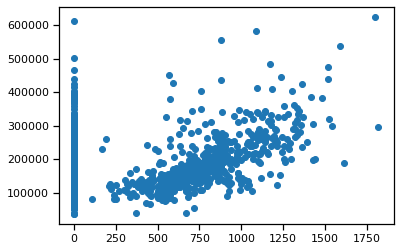

In [99]:
plt.scatter(x=train_df['2ndFlrSF'], y=train_df.SalePrice)

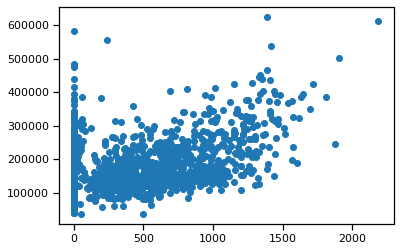

In [100]:
plt.scatter(x=train_df['BsmtFinSF1'], y=train_df.SalePrice)

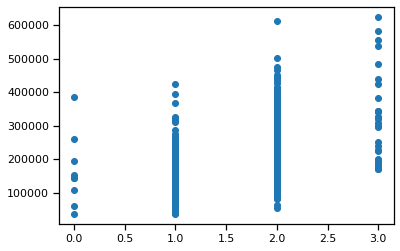

In [101]:
plt.scatter(x=train_df['FullBath'], y=train_df.SalePrice)

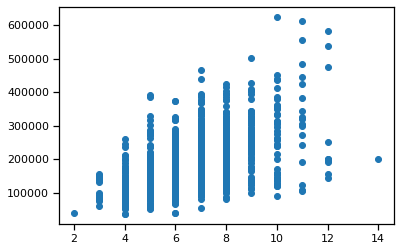

In [102]:
plt.scatter(x=train_df['TotRmsAbvGrd'], y=train_df.SalePrice) #이상치 보임

In [103]:
train_df=train_df[train_df['TotRmsAbvGrd']<14]
train_df=train_df[train_df['TotRmsAbvGrd']>2]

### 숫자형 데이터 => 상관관계 확인

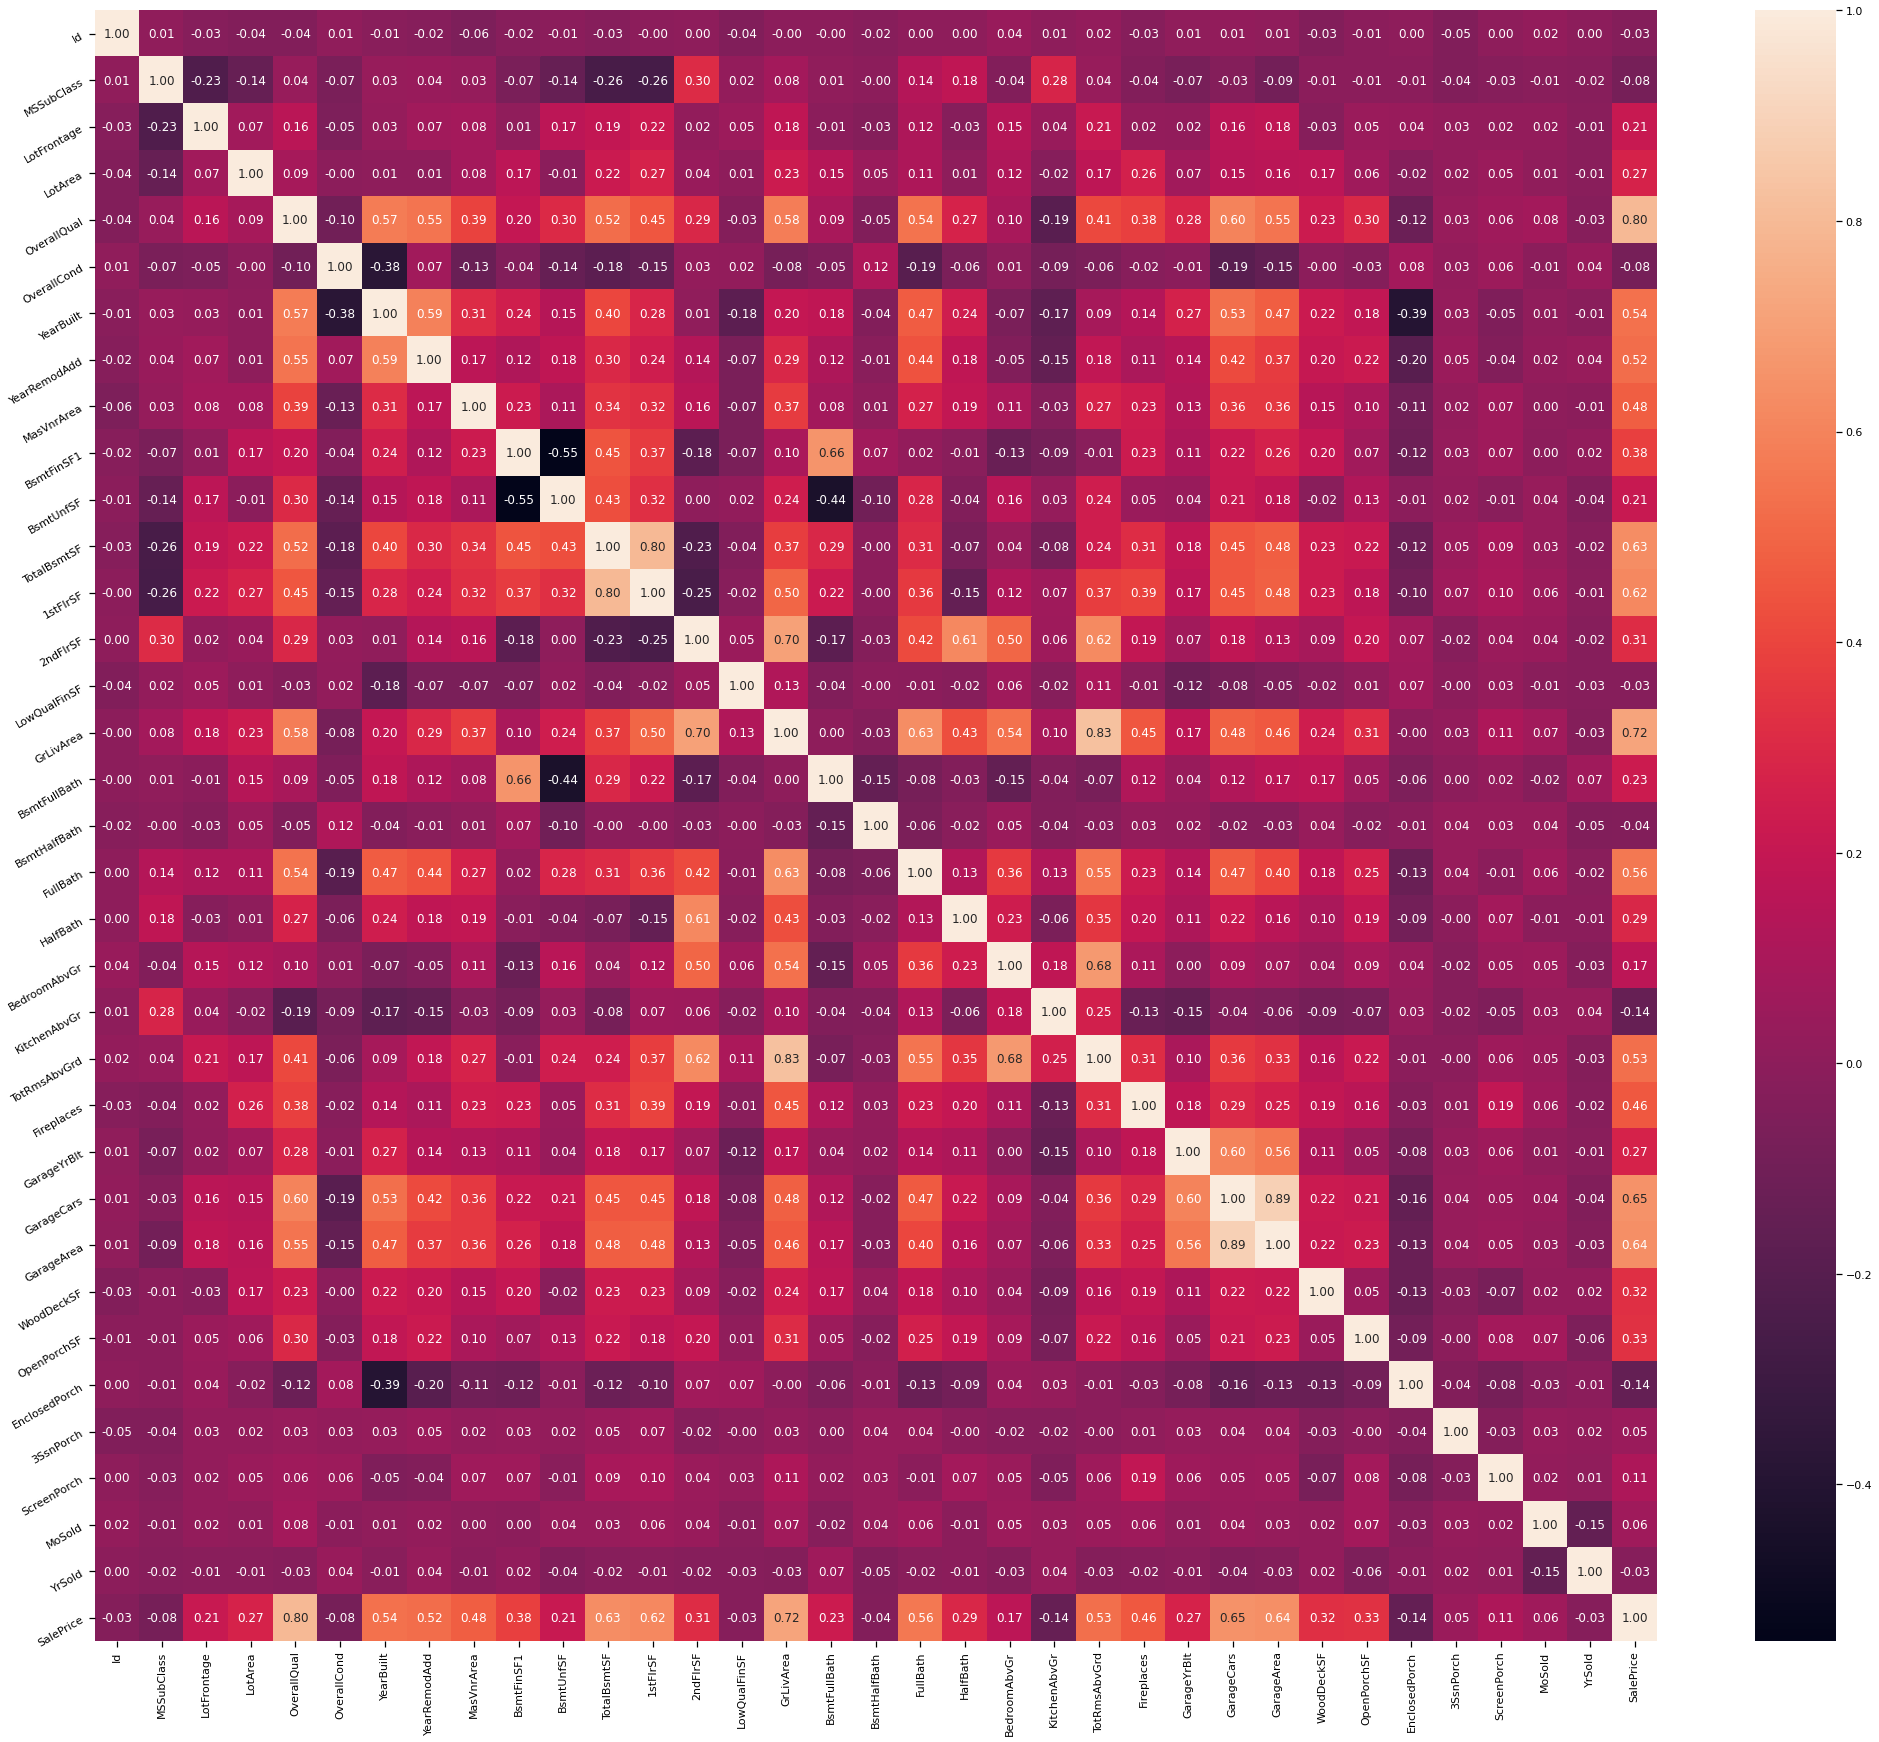

In [104]:
corr = train_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(35,30))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#### 상관 관계가 0.2 이상인 숫자형 데이터만 이용!

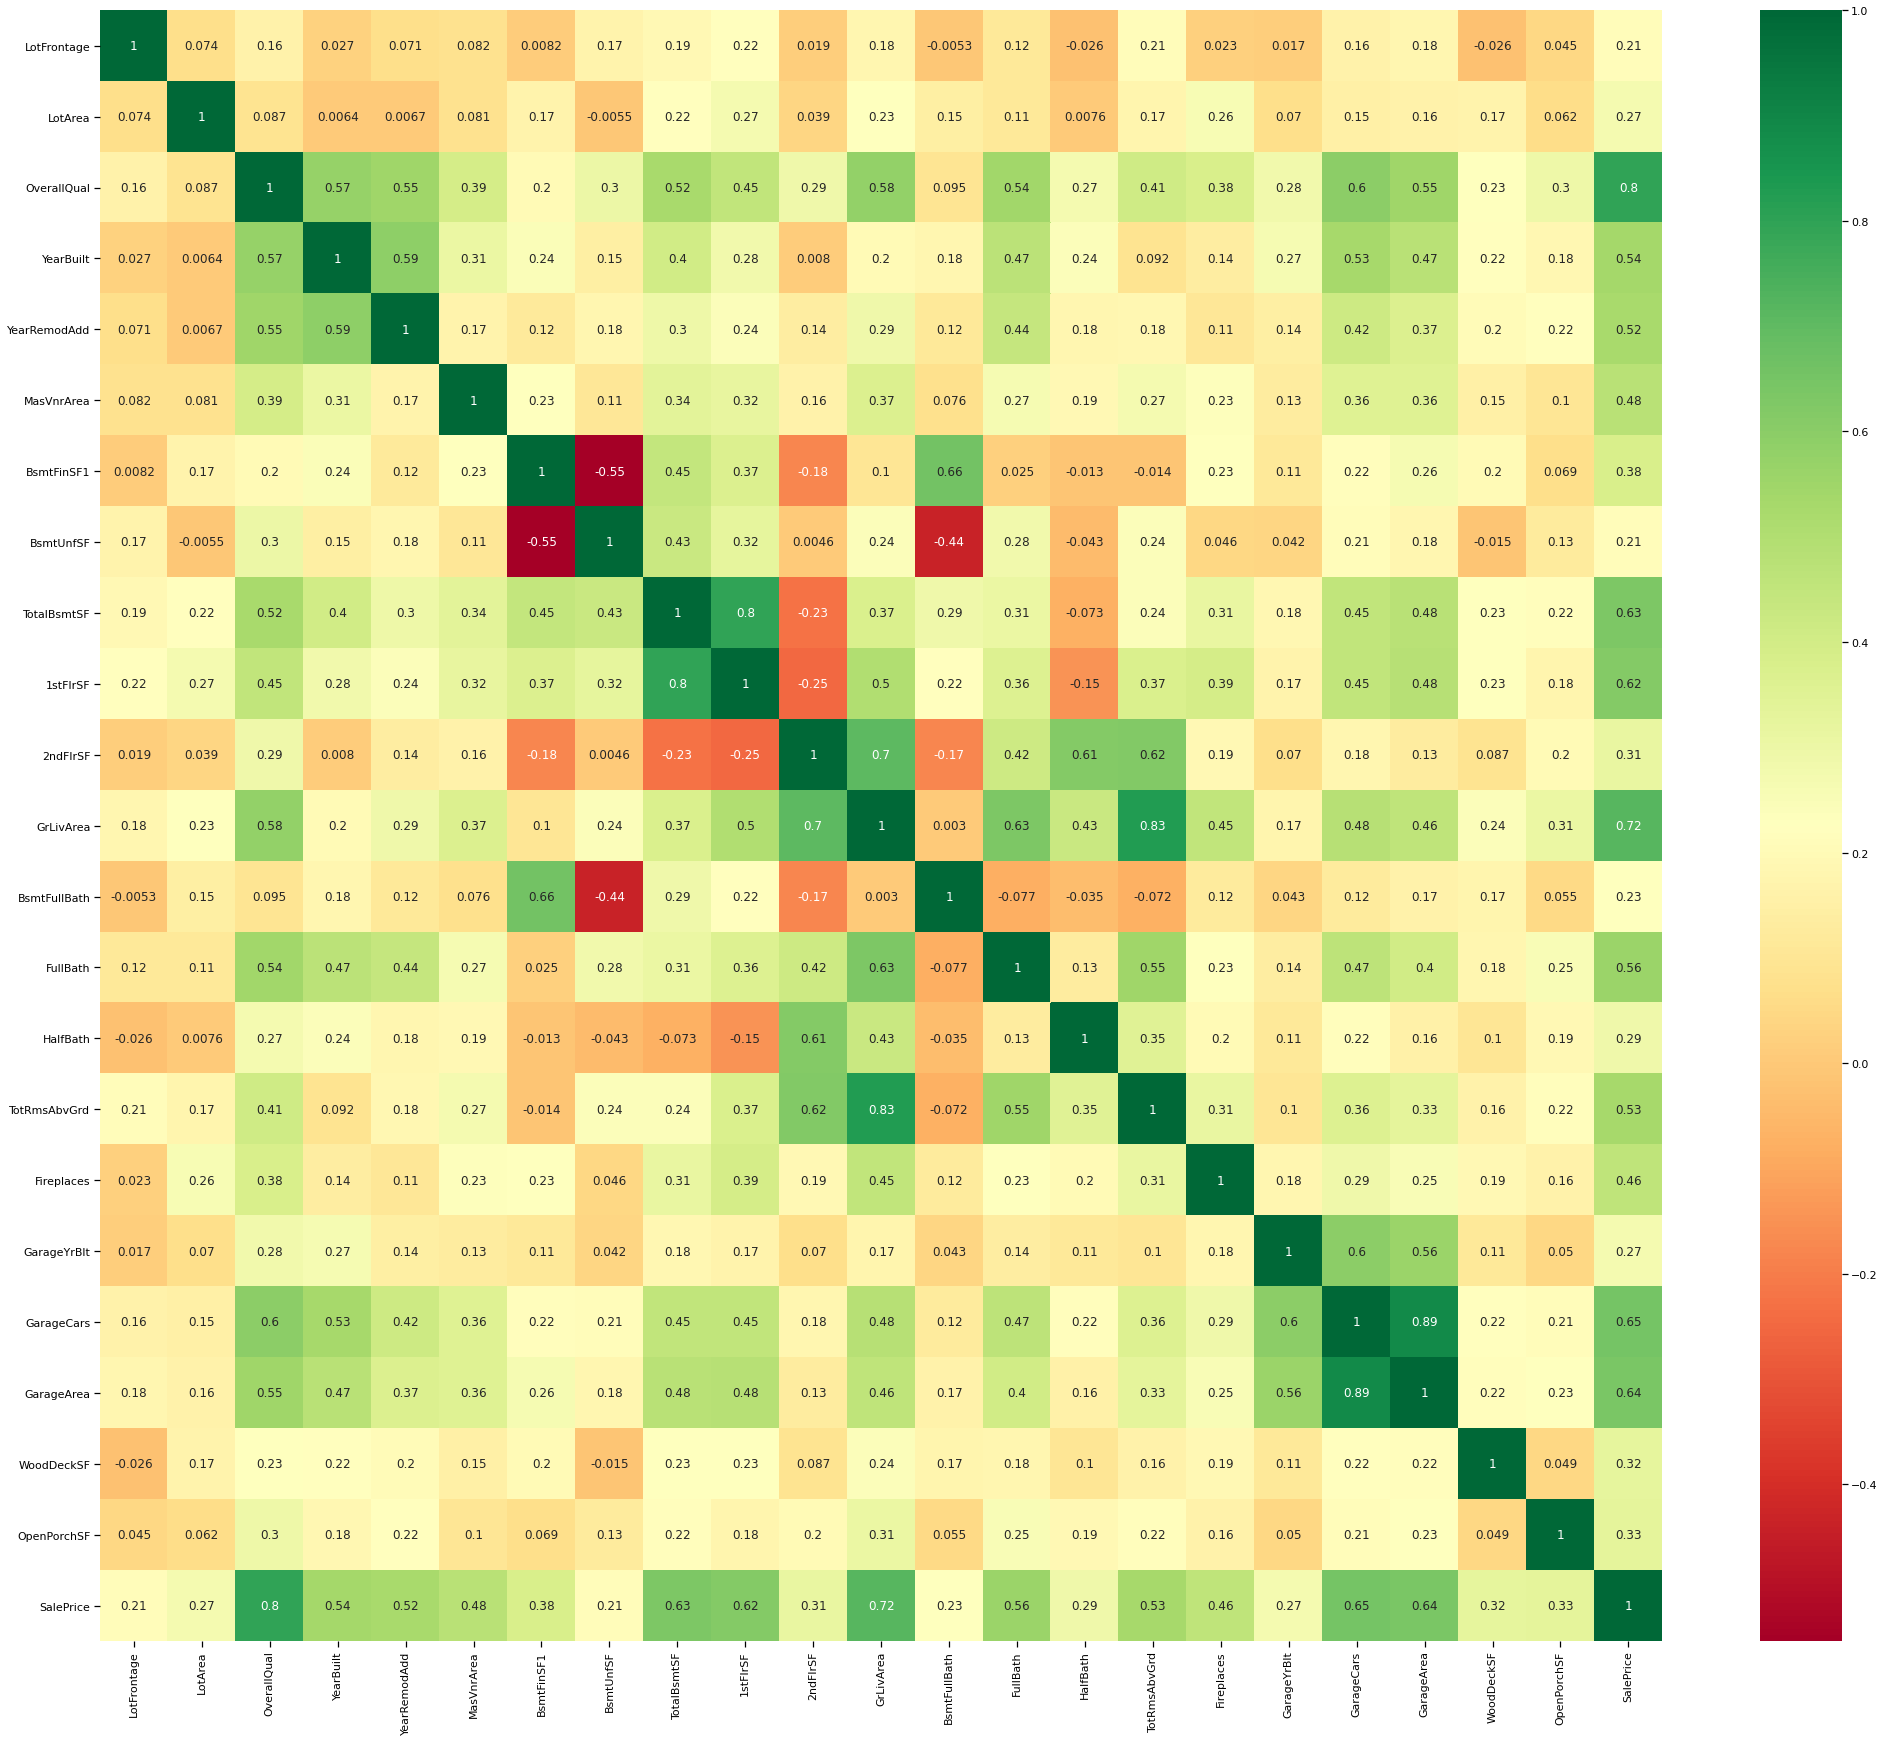

In [105]:
top_corr_features = corr.index[abs(corr["SalePrice"])>=0.2]
plt.figure(figsize=(35,30))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [106]:
col_name = set(corr.index.tolist()) - set(corr.index[abs(corr["SalePrice"])>=0.2].tolist())

In [107]:
for c in col_name:
    train_df.drop(c, axis=1, inplace=True)
    if c != 'Id':
        test_df.drop(c, axis=1, inplace=True)

In [108]:
len(train_df.columns) - len(test_df.columns) # train_df는 SalePrice가 하나 더 있음, test_df는 Id가 하나 더 있음

0

## 범주형 데이터 => 인코딩 & 상관관계 비교

* 이미 숫자 범주형인 속성 : YearRemodAdd, BsmtCond,  GarageFinish

In [109]:
col_name = set(corr.index[abs(corr["SalePrice"])>=0.2].tolist())

In [110]:
categorical_features = list(set(train_df.columns.tolist()) - col_name - {"SalePrice"})

In [111]:
train_df.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,    0., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [112]:
# float형을 int로 변환
train_df["GarageYrBlt"] = [int(t) for t in train_df["GarageYrBlt"].tolist()]

### 1. 먼저 범주형 => 정수 인코딩

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [115]:
# 훈련
for categorical_feature in categorical_features:
    train_df[categorical_feature] = train_df[categorical_feature].astype('category')
    
# 테스트
for categorical_feature in categorical_features:
    test_df[categorical_feature] = test_df[categorical_feature].astype('category') 

In [117]:
for categorical_feature in categorical_features:
    train_df[categorical_feature] = le.fit_transform(train_df[categorical_feature])
    
for categorical_feature in categorical_features:
    test_df[categorical_feature] = le.fit_transform(test_df[categorical_feature])

### 2. 범주형 데이터 상관 관계 확인

In [118]:
temp_df = train_df[categorical_features + ["SalePrice"]]

In [119]:
temp_df.corr()

ExterQual  BsmtQual  GarageQual  BldgType  CentralAir  \
ExterQual       1.000000  0.567256   -0.123964 -0.097187   -0.091213   
BsmtQual        0.567256  1.000000   -0.120443 -0.157092   -0.140861   
GarageQual     -0.123964 -0.120443    1.000000  0.045174    0.259762   
BldgType       -0.097187 -0.157092    0.045174  1.000000    0.017976   
CentralAir     -0.091213 -0.140861    0.259762  0.017976    1.000000   
Foundation     -0.411806 -0.476270    0.272896  0.146643    0.174061   
HeatingQC       0.434524  0.401243   -0.071675 -0.011092   -0.166002   
RoofStyle      -0.175199 -0.061222    0.060361 -0.051180    0.008852   
FireplaceQu     0.156287  0.055421    0.023246 -0.025212    0.035563   
GarageCond     -0.144753 -0.119421    0.615940  0.036458    0.303023   
SaleCondition  -0.198879 -0.190305    0.102505 -0.003958    0.074654   
LandContour    -0.028984 -0.027374    0.037090  0.051432    0.106497   
KitchenQual     0.628293  0.473830   -0.037349 -0.030161   -0.051201   
Neighborhood   -0.156577 -0.140410    0.022979  0.005981    0.045178   
BsmtFinType1   -0.019073 -0.018640   -0.142602 -0.066076   -0.145527   
BsmtFinType2   -0.101621 -0.123466   -0.045172  0.008270   -0.007821   
Functional     -0.049319 -0.063281    0.039510  0.008802    0.071024   
LotShape        0.149723  0.174051   -0.115837  0.114893   -0.113331   
BsmtExposure    0.223207  0.277386   -0.089838 -0.042044   -0.119185   
LotConfig      -0.007435  0.009736    0.005992  0.106541   -0.001370   
SaleType        0.086855  0.044900   -0.040803 -0.041935   -0.002557   
MSZoning        0.203145  0.163321   -0.165710  0.006014   -0.049561   
GarageType      0.265802  0.306072   -0.367455  0.005712   -0.318991   
LandSlope       0.023059  0.007404    0.012514 -0.053522   -0.001557   
GarageFinish    0.395378  0.421281   -0.048101 -0.067930   -0.119466   
HouseStyle     -0.092169 -0.191542    0.086171  0.066690    0.074152   
Exterior1st    -0.143648 -0.172661    0.017185 -0.113391    0.033198   
Condition1     -0.075606 -0.124936    0.101252 -0.022420    0.012462   
Heating         0.054057  0.060568   -0.111393  0.005169   -0.412171   
RoofMatl        0.013192 -0.011189   -0.032997 -0.034572    0.010862   
Exterior2nd    -0.120963 -0.159488   -0.012184 -0.145499    0.017459   
ExterCond      -0.059464 -0.159206    0.061600  0.085561    0.091784   
PavedDrive     -0.118041 -0.162406    0.307423  0.060961    0.332939   
MasVnrType     -0.076827 -0.084842   -0.088092 -0.027734   -0.075664   
Electrical     -0.166973 -0.172210    0.152090  0.075359    0.315910   
Condition2     -0.010127  0.026989   -0.012559  0.011350   -0.025868   
Street          0.052676 -0.030341    0.003584 -0.018057    0.070264   
BsmtCond       -0.011822 -0.014059    0.050197  0.015849    0.195663   
SalePrice      -0.645562 -0.597059    0.209666 -0.082337    0.256723   

               Foundation  HeatingQC  RoofStyle  FireplaceQu  GarageCond  \
ExterQual       -0.411806   0.434524  -0.175199     0.156287   -0.144753   
BsmtQual        -0.476270   0.401243  -0.061222     0.055421   -0.119421   
GarageQual       0.272896  -0.071675   0.060361     0.023246    0.615940   
BldgType         0.146643  -0.011092  -0.051180    -0.025212    0.036458   
CentralAir       0.174061  -0.166002   0.008852     0.035563    0.303023   
Foundation       1.000000  -0.348874   0.017481    -0.011420    0.206144   
HeatingQC       -0.348874   1.000000  -0.013689     0.098176   -0.093156   
RoofStyle        0.017481  -0.013689   1.000000    -0.055220    0.024794   
FireplaceQu     -0.011420   0.098176  -0.055220     1.000000    0.040575   
GarageCond       0.206144  -0.093156   0.024794     0.040575    1.000000   
SaleCondition    0.140963  -0.170494   0.079859    -0.047841    0.085005   
LandContour      0.058107  -0.075024   0.008417     0.048741    0.037626   
KitchenQual     -0.314060   0.385114  -0.100729     0.199903   -0.088065   
Neighborhood     0.070087  -0.038299   0.108631    -0.051680    0.0548

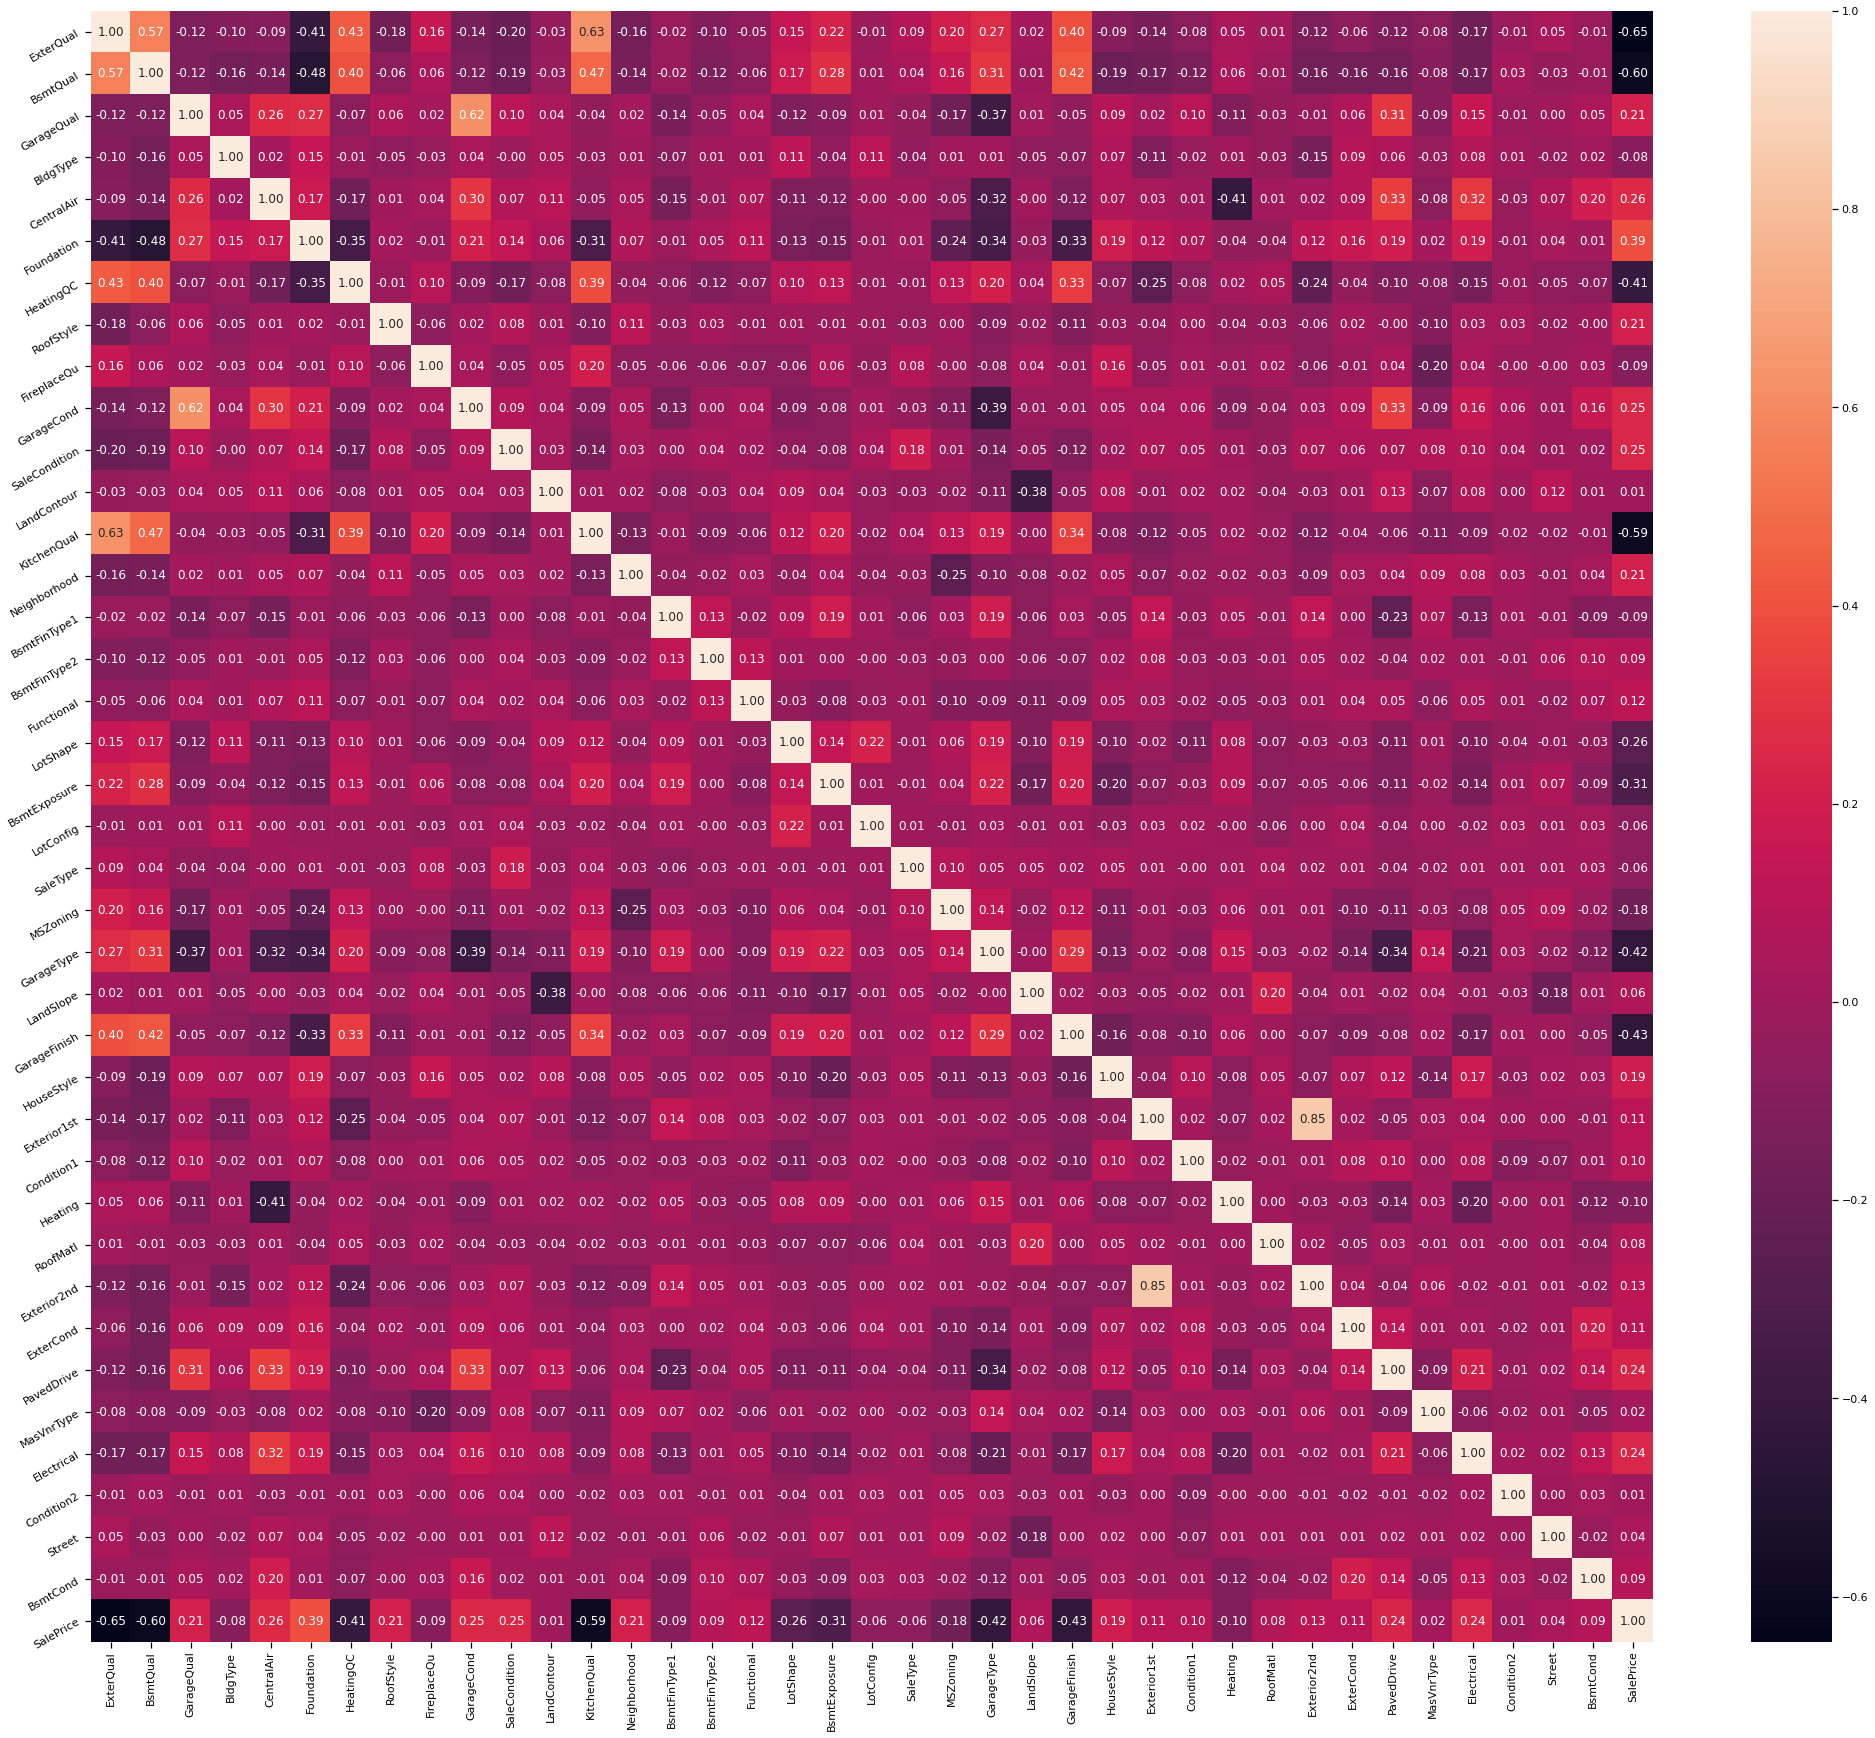

In [120]:
corr = temp_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(35,30))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

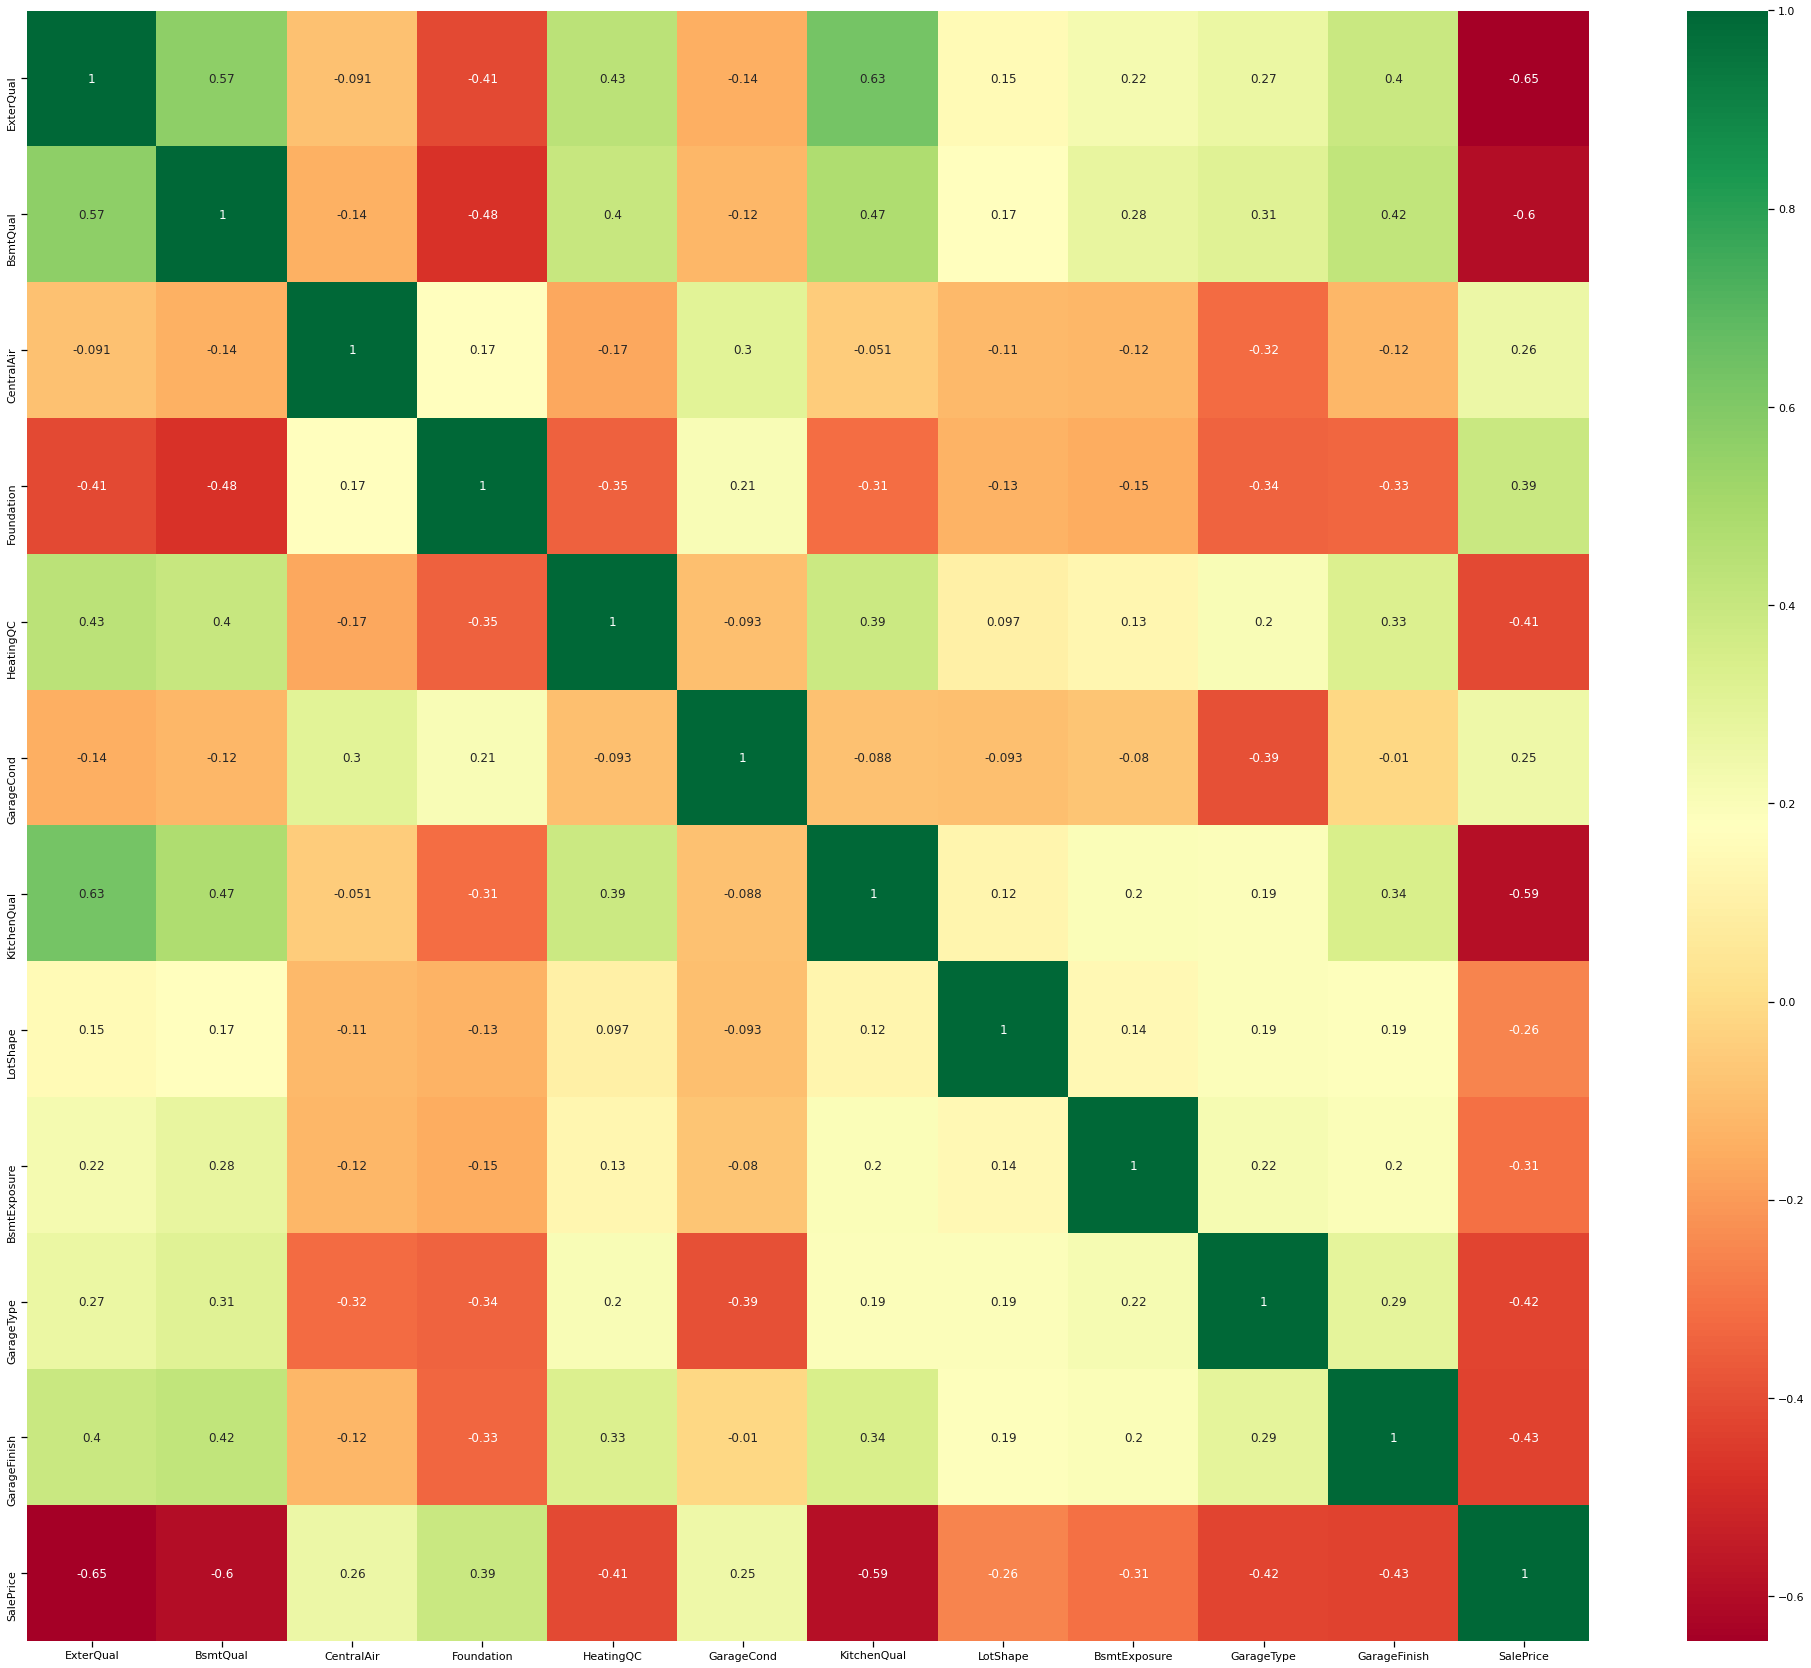

In [121]:
top_corr_features = corr.index[abs(corr["SalePrice"])>=0.25]
plt.figure(figsize=(35,30))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

* 위 상관관계인 데이터 속성만 사용할 것! (0.25보다 큰 상관관계인 범주형 데이터만 이용)

In [122]:
col_name2 = set(corr.index.tolist()) - set(corr.index[abs(corr["SalePrice"])>=0.25].tolist())

In [123]:
for c in col_name2:
    train_df.drop(c, axis=1, inplace=True)
    if c != 'Id':
        test_df.drop(c, axis=1, inplace=True)

In [124]:
train_df.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [125]:
test_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

### 최종적인 데이터 세트

In [126]:
print(len(train_df.columns))
print(len(test_df.columns))

34
34


In [127]:
print(set(train_df.columns.tolist()) - set(test_df.columns.tolist()))
print(set(test_df.columns.tolist()) - set(train_df.columns.tolist()))

{'SalePrice'}
{'Id'}


## 데이터 세트(train, validation)a split

#### 입력 데이터 확인
[method1_test_df, method2_test_df]

* X : method1_train_df
* y : method1_y
    


In [128]:
method1_train_df = train_df

In [129]:
method1_y = method1_train_df['SalePrice']
method1_train_df = method1_train_df.drop('SalePrice', axis=1)

In [130]:
from sklearn.model_selection import train_test_split # 데이터 셋 

# 방법 1
X_train1, X_val1, y_train1, y_val1 = train_test_split(method1_train_df, method1_y, \
                                                      test_size=0.2, random_state=0)

In [131]:
print(len(X_train1))
print(len(y_train1))
print(len(X_val1))
print(len(y_val1))

1157
1157
290
290


In [132]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

from xgboost.sklearn import XGBRegressor
import xgboost

In [133]:
def evaluation(model, train_x, train_y, val_x, val_y):
    cv = cross_val_score(model, train_x, train_y, cv = 10)
    y_pred = model.predict(val_x)
    cv = np.mean(cv)
    r2=r2_score(y_pred, val_y)
    mae = mean_absolute_error(y_pred, val_y)
    mse = mean_squared_error(y_pred, val_y)

    return cv, r2, mae, mse

In [134]:
def show_plot(model, val_x, val_y):
    y_pred = model.predict(val_x)

    plt.scatter(val_y, y_pred)
    plt.xlabel("Price Index: $Y_i$")
    plt.ylabel("Predicted price Index: $\hat{Y}_i$")
    plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

### [1] Linear Regression

In [135]:
lgs=LinearRegression()
lgs.fit(X_train1, y_train1)

LinearRegression()

In [138]:
result = evaluation(lgs, X_train1, y_train1, X_val1, y_val1)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.8552698911915781
R^2 score: 0.9066562448961775
Mean Absolute Erro: 18133.117399611143
Mean Mean Squared Erro: 559776868.3070656


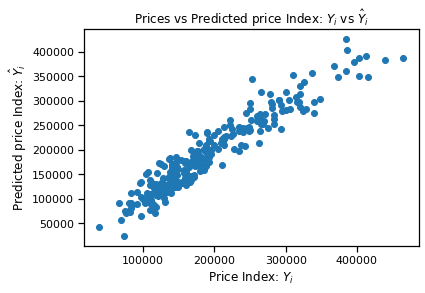

In [139]:
show_plot(lgs, X_val1, y_val1)

### [2] GradientBoostingRegressor

In [140]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=31)
gbr.fit(X_train1, y_train1)

GradientBoostingRegressor(max_depth=10, n_estimators=1000, random_state=31)

In [141]:
result = evaluation(gbr, X_train1, y_train1, X_val1, y_val1)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.792355510227655
R^2 score: 0.8757355515826085
Mean Absolute Erro: 18849.347230799918
Mean Mean Squared Erro: 745539621.7484667


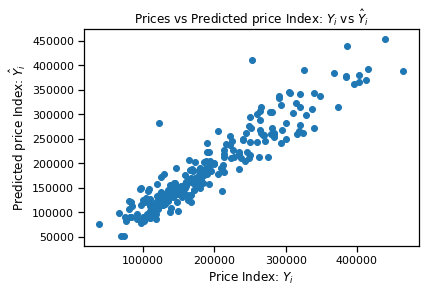

In [142]:
show_plot(gbr, X_val1, y_val1)

### [3] Random Forest Model

In [143]:
forest=RandomForestRegressor(bootstrap=False, max_depth=500, max_features='auto',
                       min_samples_leaf=15,criterion='mse', n_jobs=-1, random_state=18)

forest.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=False, max_depth=500, min_samples_leaf=15,
                      n_jobs=-1, random_state=18)

In [144]:
result = evaluation(forest, X_train1, y_train1, X_val1, y_val1)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.7594524566674383
R^2 score: 0.7998609175775819
Mean Absolute Erro: 23925.55148662101
Mean Mean Squared Erro: 1142854162.7782464


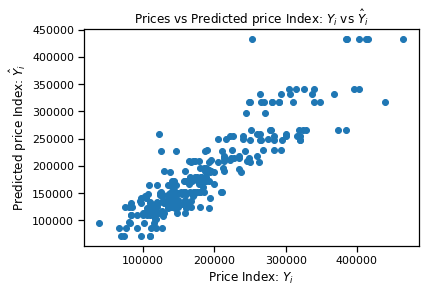

In [145]:
show_plot(forest, X_val1, y_val1)

### [4] XGBoost Regressor

In [146]:
xgb = XGBRegressor(learning_rate=0.01, n_estimators=1000, \
                       objective='reg:squarederror', random_state = 31)

xgb.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=31,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

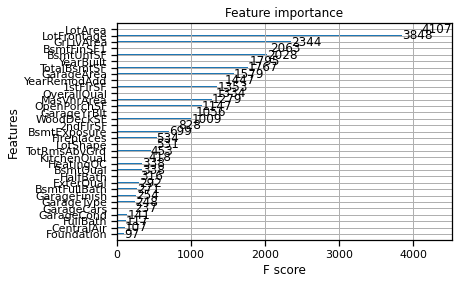

In [151]:
xgboost.plot_importance(xgb)

In [148]:
result = evaluation(xgb, X_train1, y_train1, X_val1, y_val1)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.8700871228988047
R^2 score: 0.9071063215865066
Mean Absolute Erro: 16179.118709590517
Mean Mean Squared Erro: 536123154.0828992


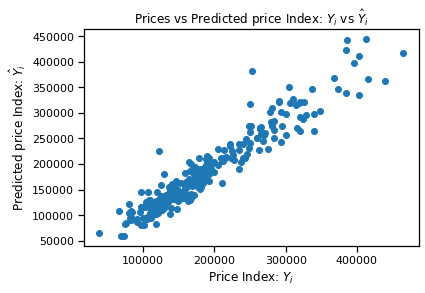

In [149]:
show_plot(xgb, X_val1, y_val1)

## Kaggle submission

TEST DATA이용

* [method1_test_df, method2_test_df]

In [154]:
ids = test_df['Id']

In [155]:
models = [lgs, gbr, forest, xgb]
models_name = ['lgs', 'gbr', 'forest', 'xgb']

In [156]:
results = []
for idx, model in enumerate(models):
    predictions = model.predict(test_df.drop(['Id'],axis=1))
    df = pd.DataFrame(list(zip(ids, predictions)), columns =['Id', 'SalePrice'])
    df.to_csv('./dataset/result_'+models_name[idx]+'.csv',index=False)